In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
df_time = pd.read_csv('./fcc-forum-pageviews.csv', index_col='date')
df_time

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4+ KB


In [5]:
df_time.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


 ### Clean data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [6]:
df_time =  df_time.loc[(df_time['value'] > df_time['value'].quantile(0.025)) & (df_time['value'] < df_time['value'].quantile(0.975))]
df_time

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Create a draw_line_plot function that uses Matplotlib to draw a line chart. The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

In [7]:
df_time.index =pd.to_datetime(df_time.index)

Text(0, 0.5, 'Page Views')

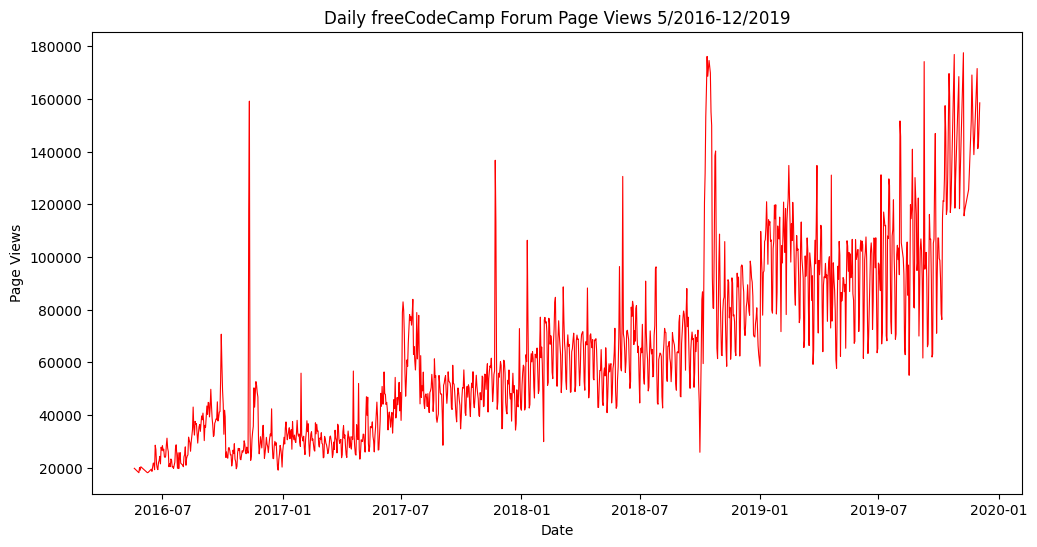

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df_time.index,df_time.value, color='red',linewidth=0.8)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

### # Draw bar plot, It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [9]:
df_bar = df_time.copy()
df_bar['Year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['Month'] = pd.DatetimeIndex(df_bar.index).month_name()
df_bar = df_bar.groupby(['Year', 'Month'])['value'].mean().round().astype(int)
df_bar = df_bar.reset_index()
df_bar

,Year,Month,value
0,2016,August,31049
1,2016,December,27832
2,2016,July,24110
3,2016,June,21875
4,2016,May,19432
5,2016,November,40449
6,2016,October,27398
7,2016,September,41477
8,2017,April,30879
9,2017,August,47712


Draw bar plot


Text(0, 0.5, 'Average Page Views')

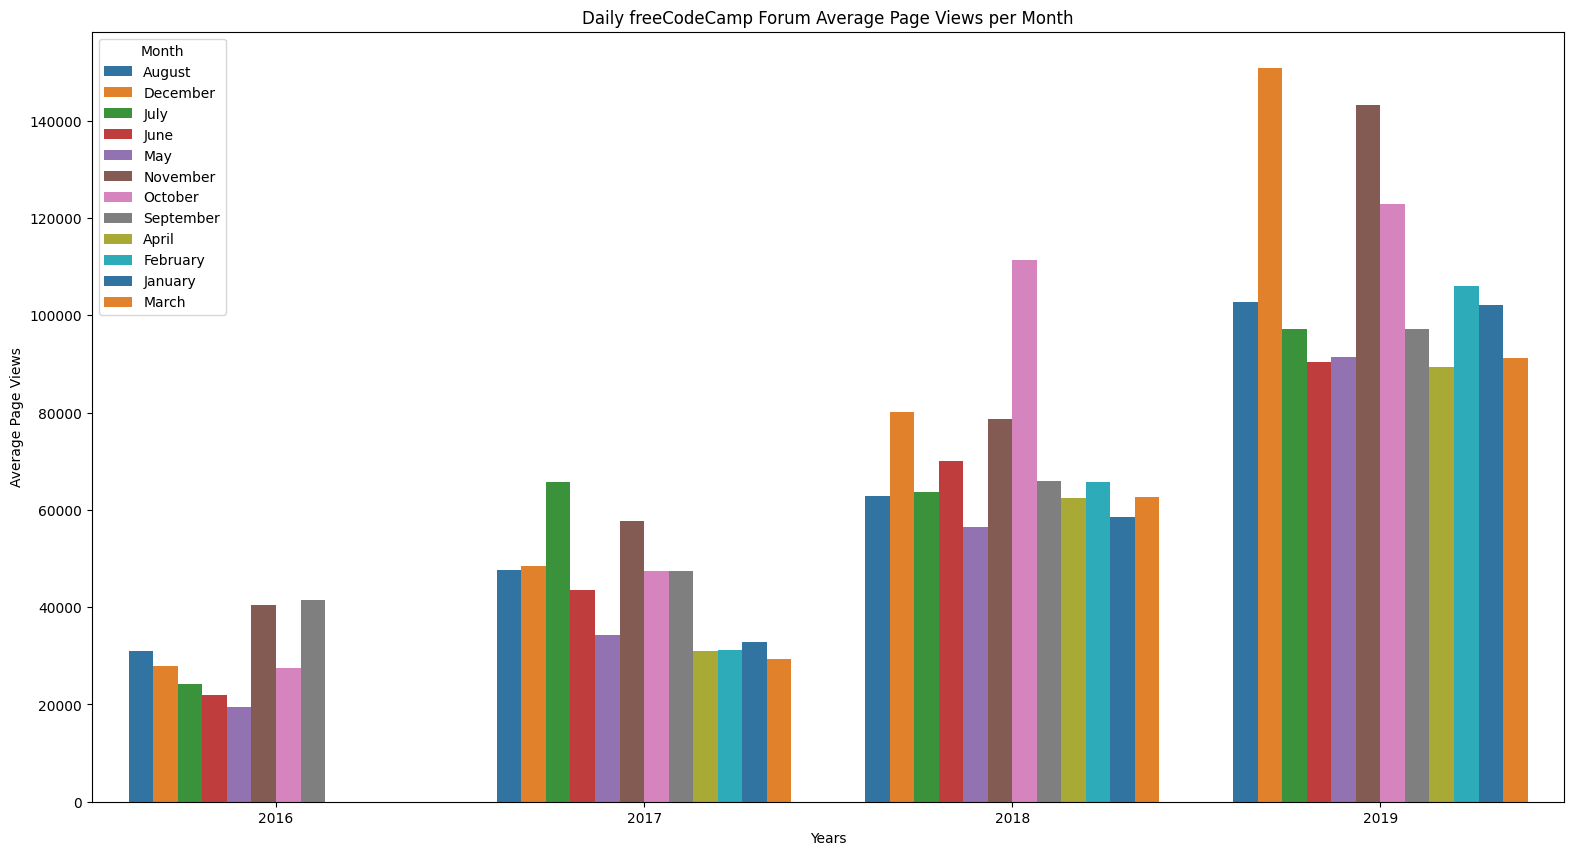

In [10]:
fig, ax = plt.subplots(figsize=(19, 10), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")
sns.barplot(x='Year', y='value', hue='Month', data=df_bar, palette="tab10")
plt.xlabel('Years')
plt.ylabel('Average Page Views')

### Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

Text(0, 0.5, 'Page Views')

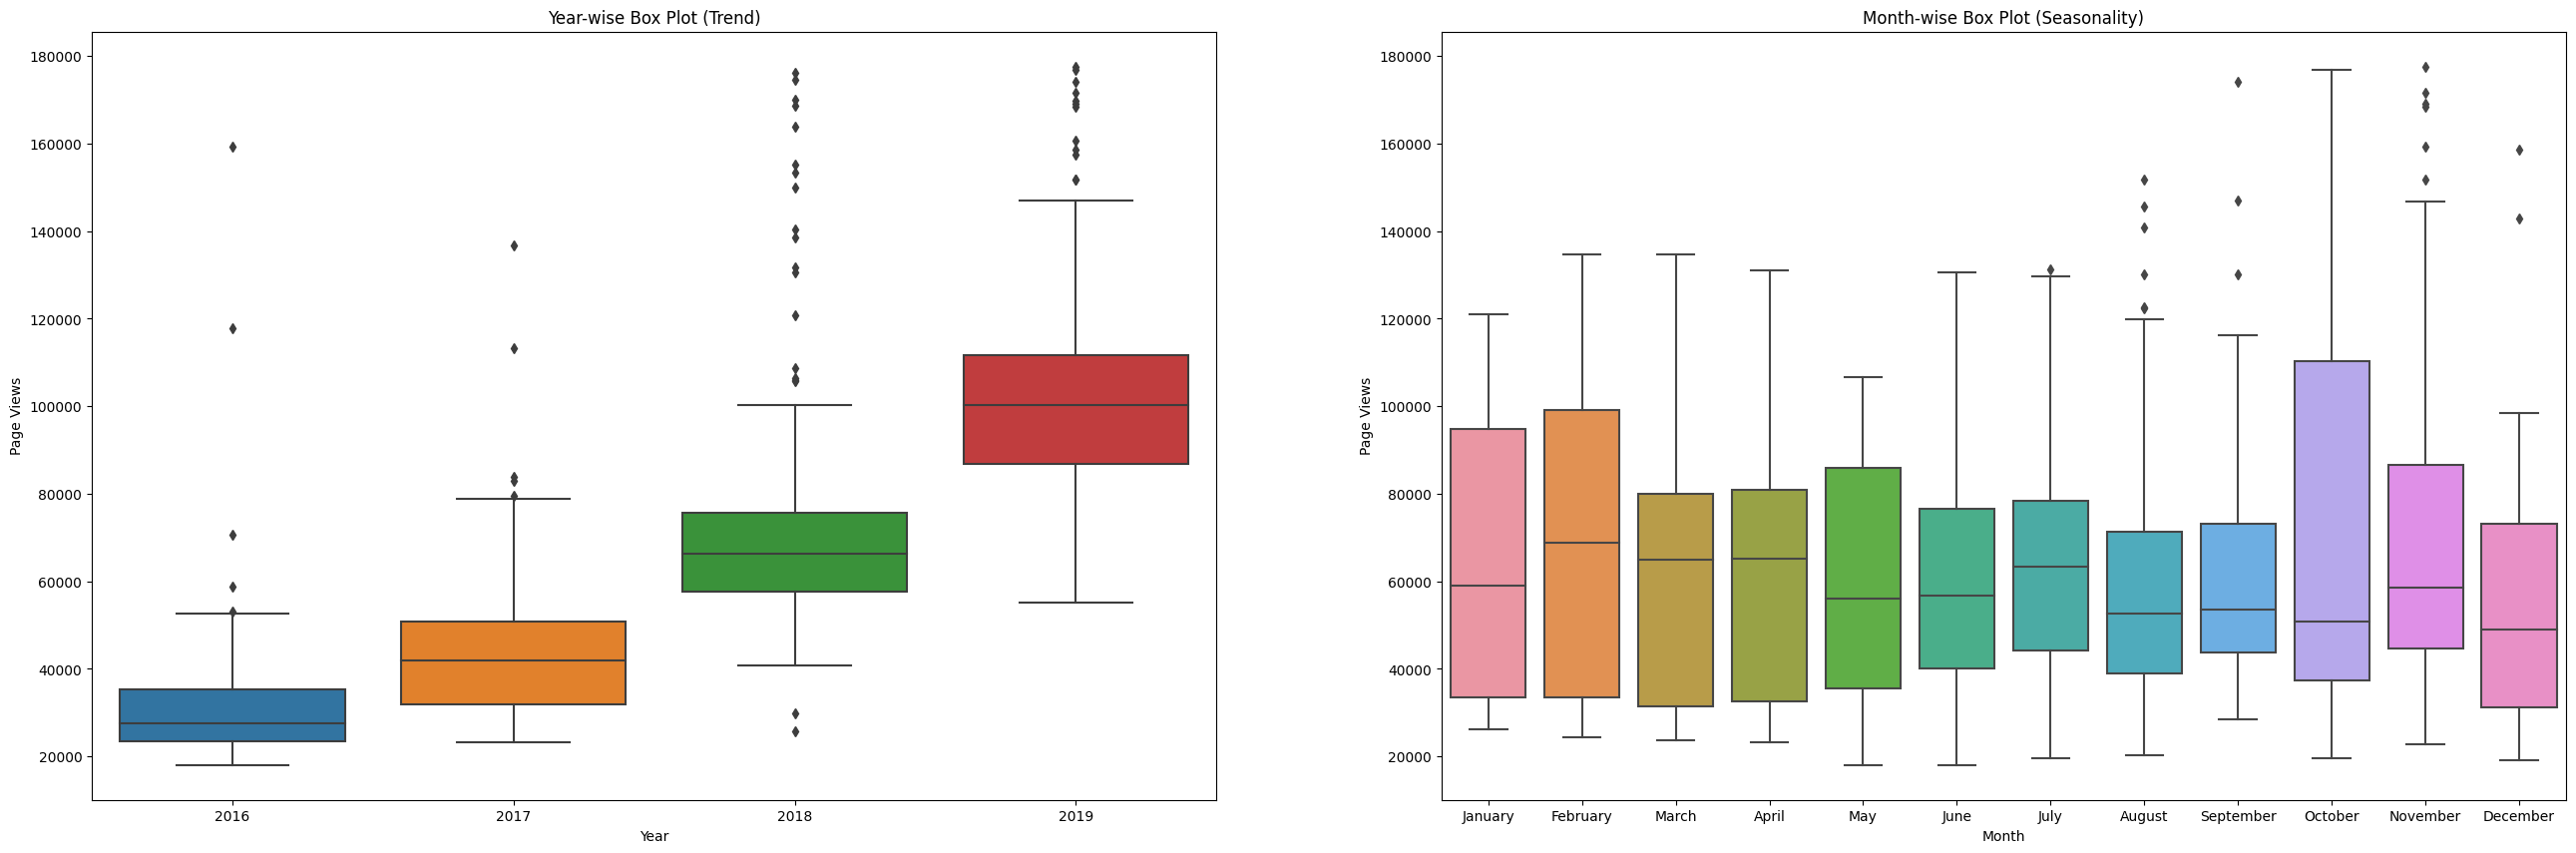

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(32, 10), dpi=100)

# Yearly boxplot
df_box = df_time.copy()
df_box['Year'] = pd.DatetimeIndex(df_box.index).year
df_box['Month'] = pd.DatetimeIndex(df_box.index).month_name()
sns.boxplot(x = "Year", y = "value", data = df_box, ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

# Monthly boxplot
month_order=['January','February','March','April', 'May','June','July','August','September','October','November','December']
df_box.sort_values('Month')
sns.boxplot(x='Month',y='value', order=month_order, data=df_box)
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")



### Yearly boxplot

Text(0, 0.5, 'Page Views')

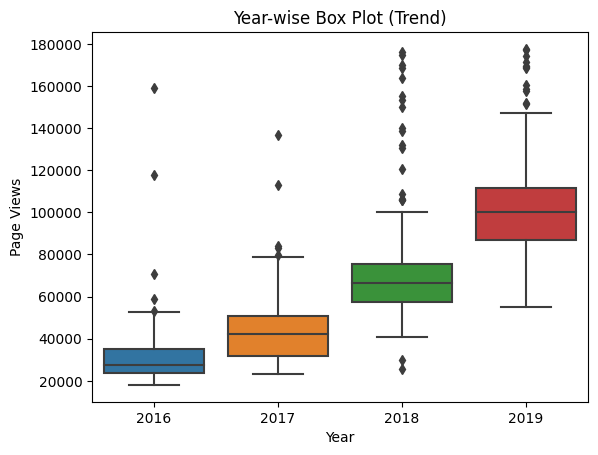

In [15]:
df_box = df_time.copy()
df_box['Year'] = pd.DatetimeIndex(df_box.index).year
df_box['Month'] = pd.DatetimeIndex(df_box.index).month_name()
plt1 =sns.boxplot(x = "Year", y = "value", data = df_box)
plt1.set_title("Year-wise Box Plot (Trend)")
plt1.set_xlabel('Year')
plt1.set_ylabel('Page Views')

### # Monthly boxplot

Text(0, 0.5, 'Page Views')

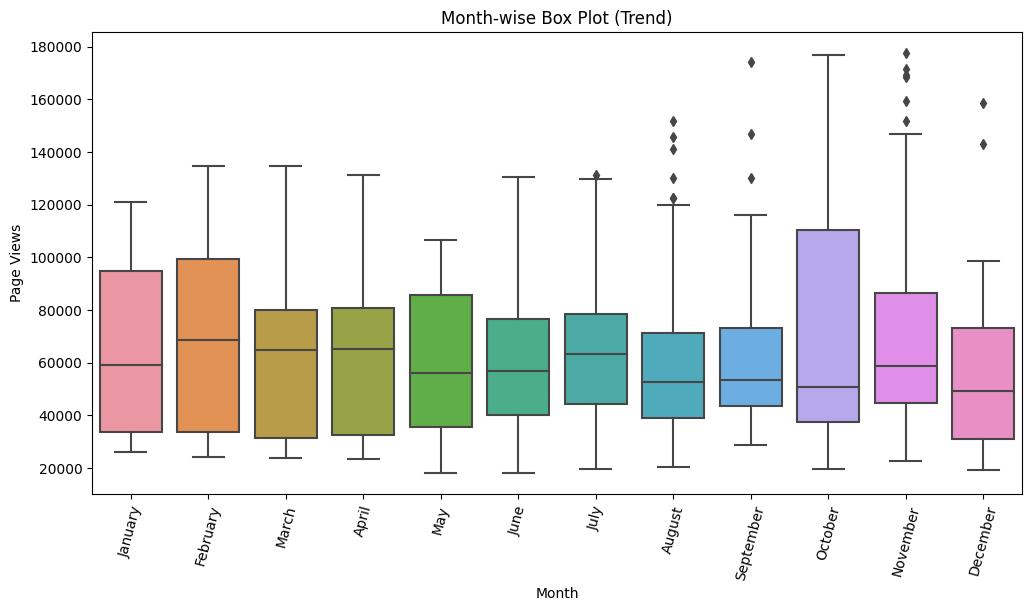

In [31]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
month_order=['January','February','March','April', 'May','June','July','August','September','October','November','December']
df_box.sort_values('Month')
plt2=sns.boxplot(x='Month',y='value', order=month_order, data=df_box)
plt2.set_title("Month-wise Box Plot (Trend)")
plt2.set_ylabel('Page Views')